In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [29]:
data=pd.read_excel("Employee_attrition.xlsx")


In [30]:
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,RD,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,RD,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,RD,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,RD,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [31]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [32]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 34 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

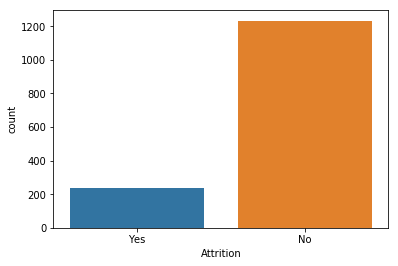

No     83.88
Yes    16.12
Name: Attrition, dtype: float64


In [33]:
sns.countplot(data.Attrition)
plt.show()
print((data.Attrition.value_counts()/len(data)*100).round(2))

In [34]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [35]:
df=pd.get_dummies(data.Attrition,drop_first=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 1 columns):
Yes    1470 non-null uint8
dtypes: uint8(1)
memory usage: 52.9 KB


In [37]:
df.head()

,Yes
0,1
1,0
2,1
3,0
4,0


In [38]:
data=data.join(df)


In [39]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,RD,8,1,Life_Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,RD,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,RD,3,4,Life_Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,RD,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [40]:
data=data.drop("Attrition",axis=1)

In [41]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,RD,8,1,Life_Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,RD,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,RD,3,4,Life_Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,RD,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0


In [42]:
data_object=data.select_dtypes(include="object")
data_numeric=data.select_dtypes(exclude="object")

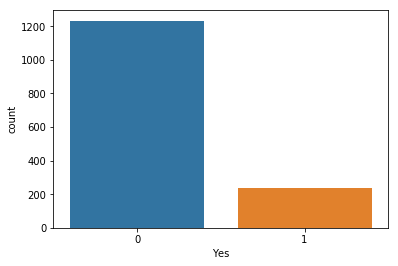

0    83.88
1    16.12
Name: Yes, dtype: float64


In [43]:
sns.countplot(data.Yes)
plt.show()
print((data.Yes.value_counts()/len(data)*100).round(2))

In [45]:
for i in data_object.columns:
    print(data_object[i].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'RD' 'Human_Resources']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree'
 'Human_Resources']
['Female' 'Male']
['Sales_Excecutive' 'Research_Scientist' 'Laboratory_Technician'
 'Manufacturing_Director' 'Healthcare_Representative' 'Manager'
 'Sales_Representative' 'Research_Director' 'Human_Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']


In [46]:
print(data_numeric.var()==0)

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
Yes                         False
dtype: bool


In [47]:
data_numeric=data_numeric.drop("StandardHours",axis=1)

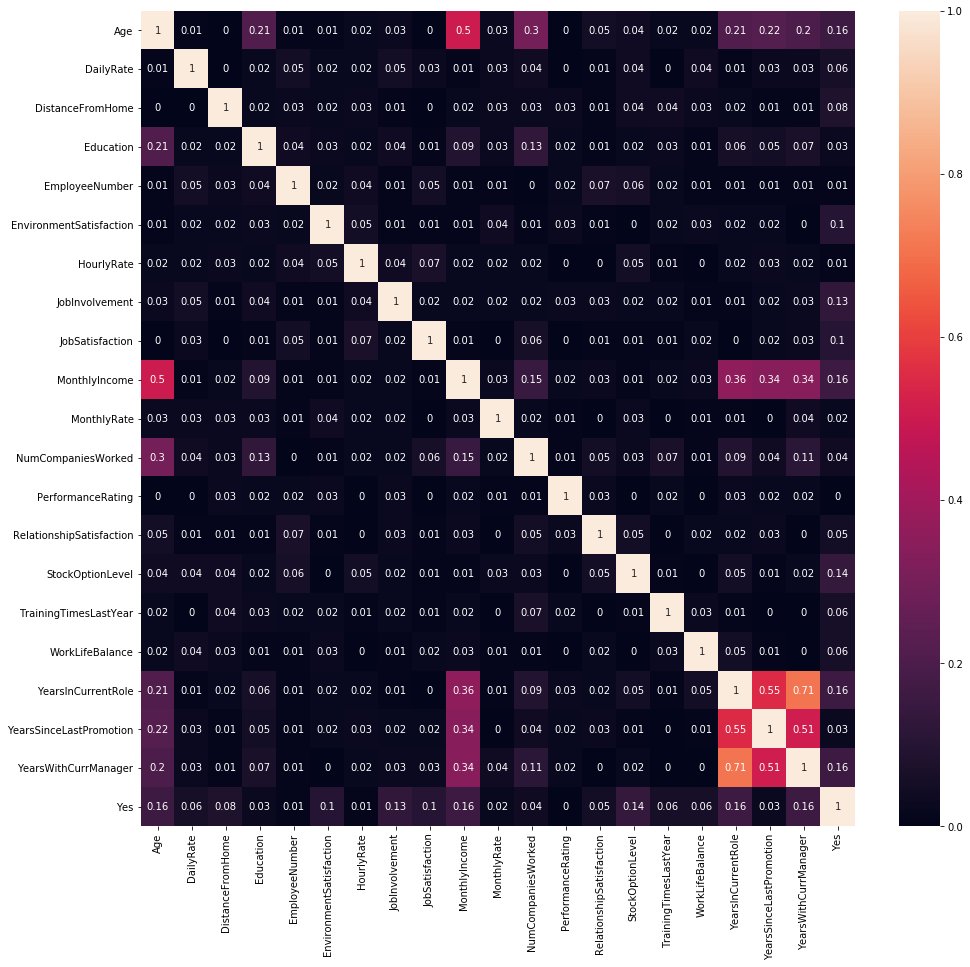

In [106]:
plt.figure(figsize=(16,15))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)

In [103]:
data_numeric=data_numeric.drop("EmployeeCount",axis=1)
data_numeric=data_numeric.drop("YearsAtCompany",axis=1)
data_numeric=data_numeric.drop("TotalWorkingYears",axis=1)
data_numeric=data_numeric.drop("PercentSalaryHike",axis=1)

In [105]:
data_numeric=data_numeric.drop("JobLevel",axis=1)

In [107]:
print(data_numeric.var()==0)

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
Yes                         False
dtype: bool


In [108]:
data_dummies=pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)


In [109]:
data_final=data_final=pd.DataFrame(data_numeric.join(data_dummies))
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 42 columns):
Age                                 1470 non-null int64
DailyRate                           1470 non-null int64
DistanceFromHome                    1470 non-null int64
Education                           1470 non-null int64
EmployeeNumber                      1470 non-null int64
EnvironmentSatisfaction             1470 non-null int64
HourlyRate                          1470 non-null int64
JobInvolvement                      1470 non-null int64
JobSatisfaction                     1470 non-null int64
MonthlyIncome                       1470 non-null int64
MonthlyRate                         1470 non-null int64
NumCompaniesWorked                  1470 non-null int64
PerformanceRating                   1470 non-null int64
RelationshipSatisfaction            1470 non-null int64
StockOptionLevel                    1470 non-null int64
TrainingTimesLastYear               1470 non-null int

In [110]:
data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Excecutive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [111]:
print(data_final.Yes.value_counts()/len(data)*100)

0    83.877551
1    16.122449
Name: Yes, dtype: float64


In [112]:
X=data_final.drop("Yes",axis=1)
Y=data_final.Yes
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [113]:
tree1=DecisionTreeClassifier(class_weight="balanced",random_state=42)
grid_search=GridSearchCV(tree1,param_grid={"max_depth":range(5,15),"min_samples_leaf":range(10,100)},scoring="roc_auc",cv=5,n_jobs=-1)
grid_search.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(5, 15), 'min_samples_leaf': range(10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [114]:
print("Best parameters:",grid_search.best_params_)
print("Best score:",grid_search.best_score_.round(2)*100)

Best parameters: {'max_depth': 6, 'min_samples_leaf': 30}
Best score: 75.0


In [115]:
tree1=DecisionTreeClassifier(max_depth=6,min_samples_leaf=48,class_weight="balanced",random_state=42)
tree1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=48, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [116]:
print("Train:",tree1.score(x_train,y_train).round(2)*100)
print("Test:",tree1.score(x_test,y_test).round(2)*100)

Train: 78.0
Test: 69.0


In [117]:
ypred1=tree1.predict(x_test)
recall_DT1=recall_score(y_test,ypred1)
print("Recall for DT 1:",recall_DT1.round(2)*100)

Recall for DT 1: 52.0


In [118]:
for i in [tree1]:
    print("roc_auc_test=",roc_auc_score(y_test,i.predict(x_test))*100)
for i in [tree1]:
    print("roc_auc_train=",roc_auc_score(y_train,i.predict(x_train))*100)    
for i in [tree1]:
    print("recall_test=",recall_score(y_test,i.predict(x_test))*100)
for i in [tree1]:
    print("recall_train=",recall_score(y_train,i.predict(x_train))*100)
for i in [tree1]:
    print("accuracy train=",i.score(x_train,y_train)*100) 
for i in [tree1]:
    print("accuracy test=",i.score(x_test,y_test)*100)

roc_auc_test= 61.82291666666667
roc_auc_train= 76.87778531152027
recall_test= 52.083333333333336
recall_train= 75.66137566137566
accuracy train= 77.6769509981851
accuracy test= 69.02173913043478


In [119]:
for i in [tree1]:
    print("roc_auc=",roc_auc_score(y_train,i.predict(x_train))*100)

roc_auc= 76.87778531152027


In [120]:
formula='Yes~'+'+'.join(X.columns.tolist())
formula

'Yes~Age+DailyRate+DistanceFromHome+Education+EmployeeNumber+EnvironmentSatisfaction+HourlyRate+JobInvolvement+JobSatisfaction+MonthlyIncome+MonthlyRate+NumCompaniesWorked+PerformanceRating+RelationshipSatisfaction+StockOptionLevel+TrainingTimesLastYear+WorkLifeBalance+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager+BusinessTravel_Travel_Frequently+BusinessTravel_Travel_Rarely+Department_RD+Department_Sales+EducationField_Life_Sciences+EducationField_Marketing+EducationField_Medical+EducationField_Other+EducationField_Technical_Degree+Gender_Male+JobRole_Human_Resources+JobRole_Laboratory_Technician+JobRole_Manager+JobRole_Manufacturing_Director+JobRole_Research_Director+JobRole_Research_Scientist+JobRole_Sales_Excecutive+JobRole_Sales_Representative+MaritalStatus_Married+MaritalStatus_Single+OverTime_Yes'

In [121]:
logit1=Logit.from_formula(formula=formula,data=data_final).fit()


         Current function value: 0.294829
         Iterations: 35


/Users/merimkrtchyan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [122]:
logit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1428
Method:                           MLE   Df Model:                           41
Date:                Thu, 29 Nov 2018   Pseudo R-squ.:                  0.3325
Time:                        20:55:18   Log-Likelihood:                -433.40
converged:                      False   LL-Null:                       -649.29
                                        LLR p-value:                 1.160e-66
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          -10.8938   1023.960     -0.011      0.992   -2017.820    1996.032
Age                                 -0.0432      0.012     -3.541      0.000      -0.067      -0.019
DailyRate                           -0.0003      0.000     -1.388      0.165      -0.001       0.000
DistanceFromHome                     0.0438      0.011      4.102      0.000       0.023       0.065
Education                            0.0093      0.088      0.107      0.915      -0.163       0.181
EmployeeNumber                      -0.0001      0.000     -0.898      0.369      -0.000       0.000
EnvironmentSatisfaction             -0.4187      0.082     -5.083      0.000      -0.580      -0.257
HourlyRate                           0.0016      0.004      0.370      0.711      -0.007       0.010
JobInvolvement                      -0.5277      0.121     -4.355      0.000      -0.765      -0.290
JobSatisfaction                     -0.3978      0.080     -4.943      0.000      -0.556      -0.240
MonthlyIncome                    -2.831e-05   5.22e-05     -0.542      0.588      -0.000     7.4e-05
MonthlyRate                       4.199e-06   1.25e-05      0.337      0.736   -2.02e-05    2.86e-05
NumCompaniesWorked                   0.1650      0.037      4.425      0.000       0.092       0.238
PerformanceRating                   -0.0989      0.250     -0.395      0.693      -0.589       0.391
RelationshipSatisfaction            -0.2515      0.082     -3.057      0.002      -0.413      -0.090
StockOptionLevel                    -0.1900      0.158     -1.206      0.228      -0.499       0.119
TrainingTimesLastYear               -0.1835      0.073     -2.525      0.012      -0.326      -0.041
WorkLifeBalance                     -0.3637      0.123     -2.946      0.003      -0.606      -0.122
YearsInCurrentRole                  -0.1156      0.042     -2.741      0.006      -0.198      -0.033
YearsSinceLastPromotion              0.2008      0.040      4.972      0.000       0.122       0.280
YearsWithCurrManager                -0.0985      0.042     -2.368      0.018      -0.180      -0.017
BusinessTravel_Travel_Frequently     1.8665      0.408      4.577      0.000       1.067       2.666
BusinessTravel_Travel_Rarely         0.9709      0.376      2.582      0.010       0.234       1.708
Department_RD                       13.5900   1023.960      0.013      0.989   -1993.334    2020.514
Department_Sales                    13.3493   1023.960      0.013      0.990   -1993.575    2020.273
EducationField_Life_Sciences        -0.7139      0.801     -0.891      0.373      -2.285       0.857
EducationField_Marketing            -0.3214      0.849     -0.379      0.705      -1.986       1.343
EducationField_Medical              -0.7941      0.801     -0.992      0.321      -2.363       0.775
EducationField_Other                -0.8147      0.861     -0.947      0.344      -2.501       0.872
Education

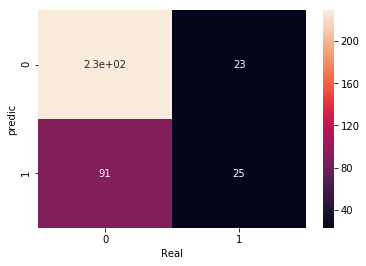

In [123]:
for i in [tree1]:
    sns.heatmap(confusion_matrix(y_test,i.predict(x_test)).T,annot=True)
    plt.xlabel("Real")
    plt.ylabel("predic")
    plt.show()

In [124]:
roc_curve_values=roc_curve(y_test,ypred1)
FPR,TPR,Tresholds=roc_curve_values

In [125]:
roc_auc1=roc_auc_score(y_test,ypred1).round(2)*100


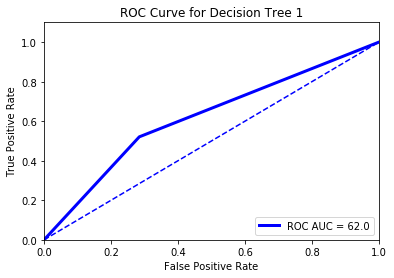

In [126]:
plt.figure()
plt.plot(FPR, TPR, color='blue', lw=3, label='ROC AUC = %0.1f'%roc_auc1)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.title('ROC Curve for Decision Tree 1')
plt.legend(loc="lower right")
plt.show()

In [127]:
logit2=LogisticRegression(random_state=42,class_weight="balanced")
grid_search3=GridSearchCV(logit2,param_grid={"C":np.linspace(0.001,10,10)},cv=5,scoring="roc_auc",n_jobs=-1)
grid_search3.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.000e-03, 1.112e+00, 2.223e+00, 3.334e+00, 4.445e+00, 5.556e+00,
       6.667e+00, 7.778e+00, 8.889e+00, 1.000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [128]:
grid_search3.best_params_

{'C': 4.445}

In [129]:
best=list(grid_search3.best_params_.values())[0]

In [130]:
logit2=LogisticRegression(C=best,random_state=42,class_weight="balanced")
logit2.fit(x_train,y_train)

LogisticRegression(C=4.445, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [131]:
print("Train:",logit2.score(x_train,y_train).round(2)*100)
print("Test:",logit2.score(x_test,y_test).round(2)*100)
ypred3=logit2.predict(x_test)
print("recall:",recall_score(y_test,ypred3).round(2)*100)
roc_auc3=roc_auc_score(y_test,ypred3).round(2)*100
print("roc_auc3:",roc_auc3)

Train: 79.0
Test: 76.0
recall: 67.0
roc_auc3: 72.0


In [132]:
roc_curve_values2=roc_curve(y_test,ypred3)
FPR2,TPR2,Tresholds2=roc_curve_values2

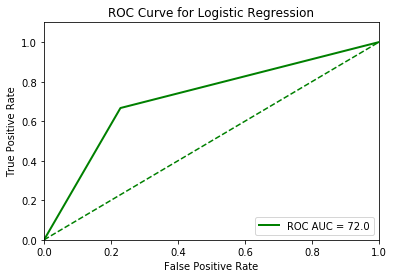

In [133]:
plt.figure()
plt.plot(FPR2, TPR2, color='green', lw=2, label='ROC AUC = %0.1f'%roc_auc3)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [134]:
for i in [tree1]:
    print(classification_report(y_test,i.predict(x_test)))

             precision    recall  f1-score   support

          0       0.91      0.72      0.80       320
          1       0.22      0.52      0.30        48

avg / total       0.82      0.69      0.74       368



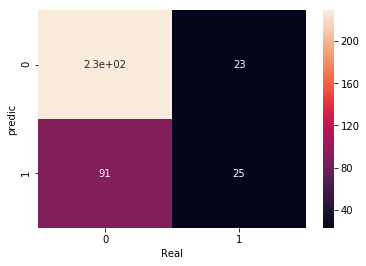

In [135]:
for i in [tree1]:
    sns.heatmap(confusion_matrix(y_test,i.predict(x_test)).T,annot=True)
    plt.xlabel("Real")
    plt.ylabel("predic")
    plt.show()